In [2]:
%matplotlib inline
import helper
import torch
import torch.optim as optim
import numpy as np
from matplotlib import image , pyplot
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [153]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

trainset= datasets.MNIST('~/.pytorch.MNIST_train.csv', download=True, train=True, transform=transform)
traindata= torch.utils.data.DataLoader(trainset, batch_size=64, shuffle= True)


testset= datasets.MNIST('~/.pytorch.MNIST_test.csv', download= True, transform=transform)
testdata=torch.utils.data.DataLoader(testset, batch_size=64, shuffle= True)

100.1%

Extracting C:\Users\GajendraPratap/.pytorch.MNIST_test.csv\MNIST\raw\train-images-idx3-ubyte.gz


113.5%

Extracting C:\Users\GajendraPratap/.pytorch.MNIST_test.csv\MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting C:\Users\GajendraPratap/.pytorch.MNIST_test.csv\MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting C:\Users\GajendraPratap/.pytorch.MNIST_test.csv\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [161]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
class Network (nn.Module):
    def __init__(self):
        super().__init__()
        fc1= nn.Linear(784, 128)
        fc2= nn.Linear(128, 64)
        fc3= nn.Liner(64, 10)
    def forward(self,x):
        x = F.ReLU(fc1(x))
        x = F.ReLU(fc1(x))
        x = F.Log_Softmax(fc1(x))


criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [182]:
epochs = 5
for e in range(epochs):
    train_loss = 0
    test_loss=0
    correct=0
    total=0
    for images, labels in traindata:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model.forward(images)
        
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    else:
        print(f"accuracy is: %0.2f"% (correct/total)*100)
        print(f"Training loss: {train_loss/len(traindata)}")
        
        
    for images, labels in testdata:
        images= images.view(images.shape[0], -1)
        
        output=model.forward(images)
        loss=criterion(output, labels)
        test_loss+= loss.item()
    else:
        print(f"Testing loss: {test_loss/len(testdata)} \n" )

accuracy is: 89.75666666666666
Training loss: 0.3559218673690804
Testing loss: 0.34658458246700546 

accuracy is: 90.21333333333334
Training loss: 0.33869159555257256
Testing loss: 0.3297735329534707 

accuracy is: 90.59833333333333
Training loss: 0.3249090458236651
Testing loss: 0.3182914016692877 

accuracy is: 90.93
Training loss: 0.3135994533454177
Testing loss: 0.30634365784429285 

accuracy is: 91.17666666666666
Training loss: 0.3036917630416244
Testing loss: 0.29877027194065325 



In [220]:
print(images[0].shape)

torch.Size([1, 28, 28])


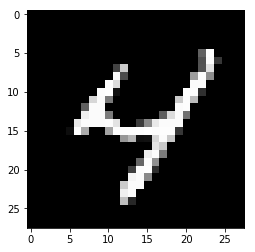

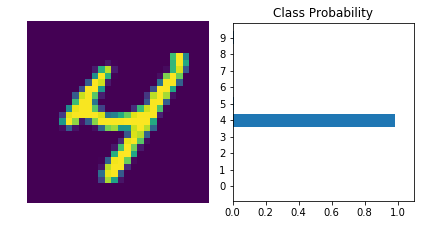

In [221]:


images, label= next(iter(traindata))
img= images[0].view(1,784)

with torch.no_grad():
    logit= model.forward(img)
img1=img.resize_(28,28)
pyplot.imshow(img1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
pyplot.show()

op= F.softmax(logit, dim=1)
helper.view_classify(img.view(1,28,28), op)

In [225]:
print(img.shape, img.dtype)
print(img)

torch.Size([28, 28]) torch.float32
tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000,

(28, 28, 3)
(28, 28)


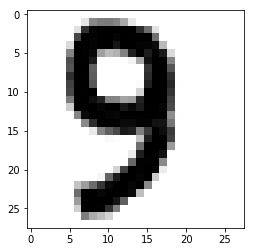

In [268]:
#MANUALLY INPUTTING THE IMAGE

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])



img = image.imread('9.png')     
print(img.shape)
gray = rgb2gray(img) 
print(gray.shape)
#print(1-gray)
pyplot.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
pyplot.show()

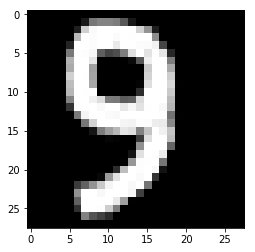

(28, 28)


In [269]:

gray=1-gray
pyplot.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
pyplot.show()
print(gray.shape)

In [270]:
gray= (gray-0.5)/0.5
print(gray)

[[-0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998    ]
 [-0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.80374119 -0.06656006  0.02754823  0.03539059 -0.02734829
  -0.31751533 -0.81942589 -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998    ]
 [-0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.75668707  0.6314094   0.96078823  1.          1.          1.
   1.          1.          0.63925176  0.15302587 -0.77237178 -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998     -0.9998     -0.9998
  -0.9998     -0.9998     -0.9998     -0.9998    ]
 [-0.99

In [271]:

%matplotlib inline
import helper

gray=torch.from_numpy(gray)
gray=gray.float()
#gray.resize_(1,784);

In [272]:
gray= gray.view(1,784)
print(gray.shape, gray.dtype)

torch.Size([1, 784]) torch.float32


(tensor([0.8646]), tensor([3]))


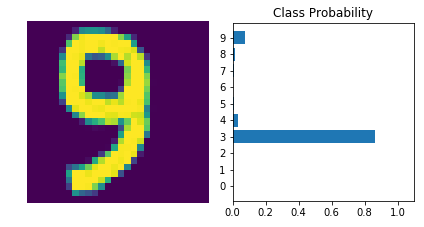

In [273]:

with torch.no_grad():
    logps = model.forward(gray)

    
ps = F.softmax(logps,dim=1)
helper.view_classify(gray.view(1, 28, 28), ps)
result=ps.max(1)
print(result)